problem :- Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers. 


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings('ignore')

In [2]:
Train=pd.read_csv('train_4.csv')
Test=pd.read_csv('test_4.csv')

In [3]:
Train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
Train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
Train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [7]:
Train=Train.drop('Loan_ID',axis=1)

In [8]:
Train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [9]:
Train['Gender']=Train['Gender'].map({'Male':1,"Female":0})
Train['Married']=Train['Married'].map({'Yes':1,"No":0})
Train['Self_Employed']=Train['Self_Employed'].map({'Yes':1,"No":0})
Train['Property_Area']=pd.get_dummies(data=Train['Property_Area'],drop_first=True)
Train['Education']=Train['Education'].map({'Graduate':1,'Not Graduate':0})
Train['Loan_Status']=Train['Loan_Status'].map({'Y':1,'N':0})

In [10]:
Train['Dependents'].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [11]:
Train=Train.drop('Dependents',axis=1)

In [12]:
Train.head()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.0,0.0,1,0.0,5849,0.0,NaN,360.0,1.0,0,1
1,1.0,1.0,1,0.0,4583,1508.0,128.0,360.0,1.0,0,0
2,1.0,1.0,1,1.0,3000,0.0,66.0,360.0,1.0,0,1
3,1.0,1.0,0,0.0,2583,2358.0,120.0,360.0,1.0,0,1
4,1.0,0.0,1,0.0,6000,0.0,141.0,360.0,1.0,0,1


In [13]:
Test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [14]:
Train.isnull().sum()

Gender               13
Married               3
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

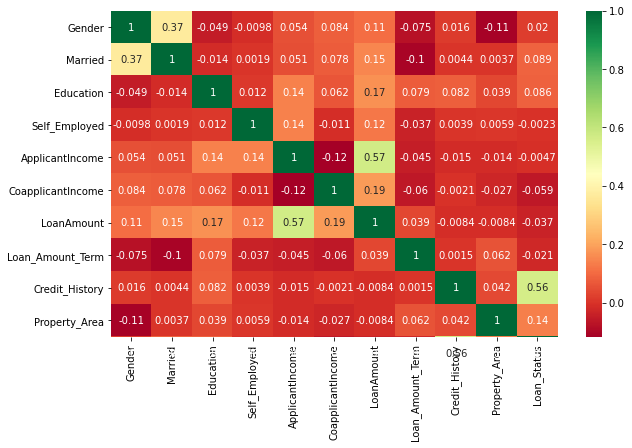

In [15]:
plt.figure(figsize=(10,6))
sns.heatmap(Train.corr(),annot=True,cmap="RdYlGn")
plt.ylim(10,0)
plt.show()

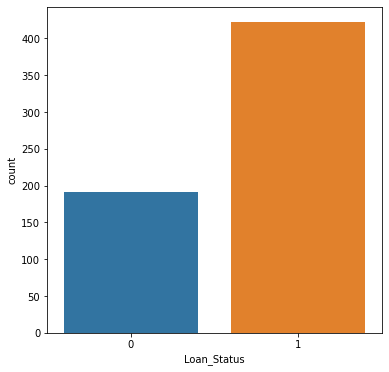

In [16]:
plt.figure(figsize=(6,6))
sns.countplot(Train['Loan_Status'])
plt.show()

<AxesSubplot:>

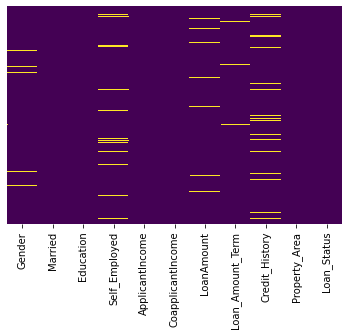

In [17]:
sns.heatmap(Train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

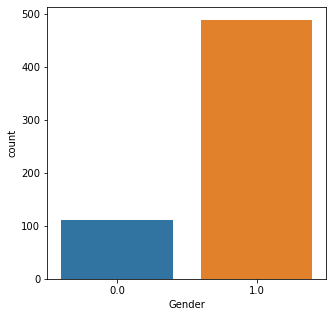

In [18]:
plt.figure(figsize=(5,5))
sns.countplot(Train['Gender'])
plt.show()

In [19]:
Train.Gender=Train.Gender.fillna(value=1.0)

In [20]:
Train.Married=Train.Married.fillna(value=1.0)

<AxesSubplot:xlabel='Self_Employed', ylabel='ApplicantIncome'>

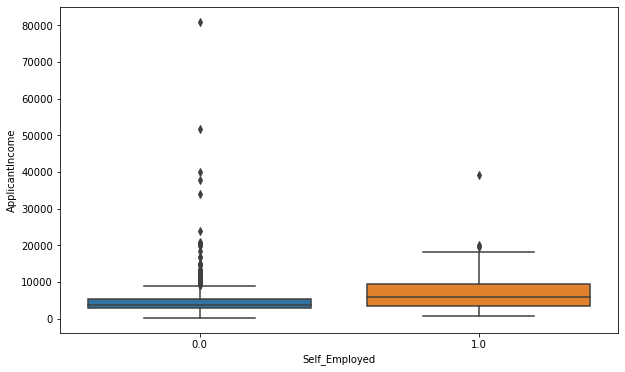

In [21]:
plt.figure(figsize=(10,6))
sns.boxplot(y=Train.ApplicantIncome,x=Train.Self_Employed)

In [22]:
Train.isnull().sum()

Gender                0
Married               0
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

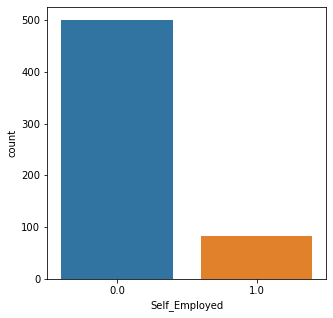

In [23]:
plt.figure(figsize=(5,5))
sns.countplot(Train['Self_Employed'])
plt.show()

In [24]:
Train.Self_Employed=Train.Self_Employed.fillna(value=0.0,)

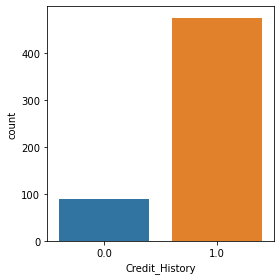

In [25]:
plt.figure(figsize=(4,4))
sns.countplot(Train['Credit_History'])
plt.tight_layout()

<AxesSubplot:xlabel='Credit_History', ylabel='ApplicantIncome'>

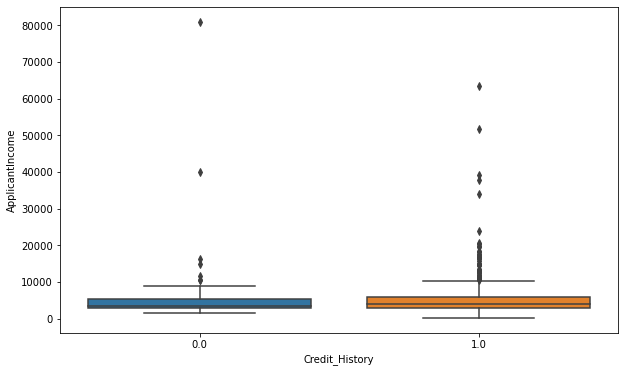

In [26]:

plt.figure(figsize=(10,6))
sns.boxplot(y=Train.ApplicantIncome,x=Train.Credit_History)

In [27]:
Train.Credit_History=Train.Credit_History.fillna(value=1.0)

In [28]:
Train.Loan_Amount_Term.unique()

array([360., 120., 240.,  nan, 180.,  60., 300., 480.,  36.,  84.,  12.])

In [29]:
Train.isnull().sum()

Gender                0
Married               0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [30]:
Train.corr()['Loan_Amount_Term']*100

Gender                -7.453907
Married              -10.204899
Education              7.878429
Self_Employed         -3.436080
ApplicantIncome       -4.530609
CoapplicantIncome     -5.987801
LoanAmount             3.944725
Loan_Amount_Term     100.000000
Credit_History         0.044516
Property_Area          6.195661
Loan_Status           -2.126766
Name: Loan_Amount_Term, dtype: float64

<AxesSubplot:>

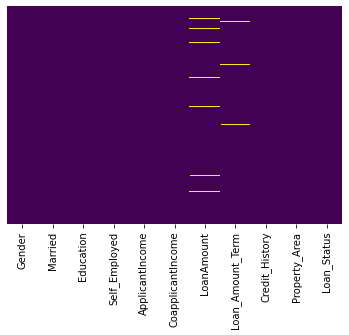

In [31]:
sns.heatmap(Train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [32]:
Train.Loan_Amount_Term.value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [33]:
Train.Loan_Amount_Term=Train.Loan_Amount_Term.fillna(value=360.0,)

<AxesSubplot:xlabel='Loan_Status', ylabel='LoanAmount'>

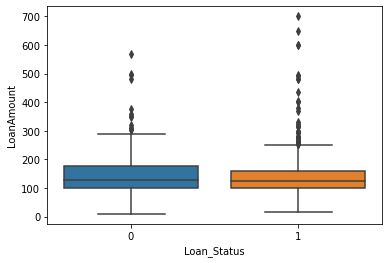

In [34]:
sns.boxplot(y=Train.LoanAmount,x=Train.Loan_Status)

In [35]:
Train.LoanAmount=Train.LoanAmount.fillna(value=Train.LoanAmount.median())

<AxesSubplot:>

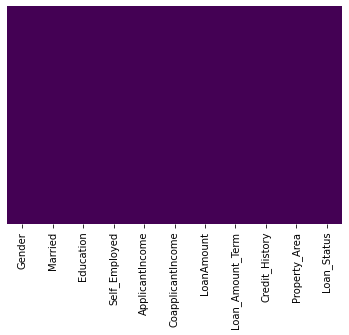

In [36]:
sns.heatmap(Train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [37]:
x=Train.drop('Loan_Status',axis=1)
y=Train['Loan_Status']

In [38]:
from sklearn.preprocessing import StandardScaler

In [39]:
scaler=StandardScaler()

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=101)

In [42]:
X_train=scaler.fit_transform(X_train)

In [43]:
X_test=scaler.fit_transform(X_test)

In [44]:
from sklearn.pipeline import Pipeline

In [45]:
pipeline_lr=Pipeline([('scaler1',StandardScaler()),
                      ('lr_classifier',LogisticRegression(random_state=0))])

In [46]:
pipeline_svc=Pipeline([('scaler2',StandardScaler()),
                      ('svc_classifier',SVC(random_state=0))])

In [47]:
pipeline_dt=Pipeline([('scaler3',StandardScaler()),
                      
                      ('dt_classifier',DecisionTreeClassifier(random_state=0))])

In [48]:
pipeline_rf=Pipeline([('scaler4',StandardScaler()),
                      
                      ('rf_classifier',RandomForestClassifier(random_state=0))])

In [49]:
pipeline_xgb=Pipeline([('scaler5',StandardScaler()),
                      
                      ('xgb_classifier',XGBClassifier(random_state=0))])

In [50]:
pipelines=[pipeline_lr,pipeline_svc,pipeline_dt,pipeline_rf,pipeline_xgb]

In [51]:
best_accuracy=0.0
best_classifier=0
best_pipeline=""

In [52]:
pipe_dic={0:'logistic regression',1:'SVC',2:'Decision Tree',3:'Random Forest',4:'XGBoost'}

for pipe in pipelines:
    pipe.fit(X_train,y_train)

[19:22:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [53]:
for i,model in enumerate(pipelines):
    print("{} Test Accuracy: {}".format(pipe_dic[i],model.score(X_test,y_test)))

logistic regression Test Accuracy: 0.7783783783783784
SVC Test Accuracy: 0.7837837837837838
Decision Tree Test Accuracy: 0.6486486486486487
Random Forest Test Accuracy: 0.7351351351351352
XGBoost Test Accuracy: 0.7135135135135136


In [54]:
for i,model in enumerate(pipelines):
    if model.score(X_test,y_test)>best_accuracy:
        best_accuracy=model.score(X_test,y_test)
        best_pipeline=model
        best_classifier=i
print('Classifier with best accuracy score:{}'.format(pipe_dic[best_classifier]))

Classifier with best accuracy score:SVC


In [55]:
Test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [56]:
Test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [57]:
Test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [58]:
Test=Test.drop('Loan_ID',axis=1)

In [59]:
Test.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [60]:
Test['Gender']=Test['Gender'].map({'Male':1,"Female":0})
Test['Married']=Test['Married'].map({'Yes':1,"No":0})
Test['Self_Employed']=Test['Self_Employed'].map({'Yes':1,"No":0})
Test['Property_Area']=pd.get_dummies(data=Test['Property_Area'],drop_first=True)
Test['Education']=Test['Education'].map({'Graduate':1,'Not Graduate':0})

In [61]:
Test1.head()

NameError: name 'Test1' is not defined

In [62]:
Test=Test.drop('Dependents',axis=1)

<AxesSubplot:>

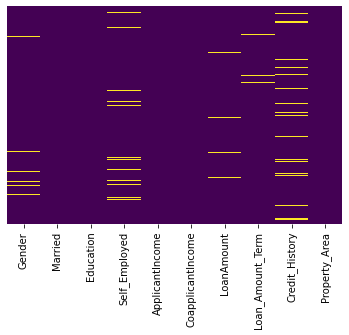

In [63]:
sns.heatmap(Test.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [64]:
Test.Gender=Test.Gender.fillna(value=1.0,)
Test.Married=Test.Married.fillna(value=1.0,)
Test.Credit_History=Test.Credit_History.fillna(value=1.0,)

In [65]:

Test.Loan_Amount_Term=Test.Loan_Amount_Term.fillna(value=360.0,)

In [66]:
Test.LoanAmount=Test.LoanAmount.fillna(value=Test.LoanAmount.median())


In [67]:
Test.Self_Employed=Test.Self_Employed.fillna(value=0.0,)


<AxesSubplot:>

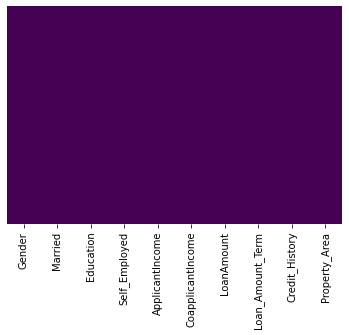

In [68]:
sns.heatmap(Test.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [69]:
Test.isnull().sum()


Gender               0
Married              0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [70]:
X_Test=Test.iloc[0:]

In [71]:
X_Test=scaler.transform(X_Test)

In [72]:
X_Test

array([[ 0.48304589,  0.7801895 ,  0.53359369, ...,  0.21767864,
         0.42230788, -0.74472938],
       [ 0.48304589,  0.7801895 ,  0.53359369, ...,  0.21767864,
         0.42230788, -0.74472938],
       [ 0.48304589,  0.7801895 ,  0.53359369, ...,  0.21767864,
         0.42230788, -0.74472938],
       ...,
       [ 0.48304589, -1.28173989,  0.53359369, ...,  0.21767864,
         0.42230788,  1.34276964],
       [ 0.48304589,  0.7801895 ,  0.53359369, ...,  0.21767864,
         0.42230788, -0.74472938],
       [ 0.48304589, -1.28173989,  0.53359369, ..., -2.63165264,
         0.42230788, -0.74472938]])

In [73]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [74]:
lr=LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [75]:
lr_pred=lr.predict(X_test)

In [76]:
from sklearn.metrics import classification_report, accuracy_score,confusion_matrix

In [77]:
cm=confusion_matrix(lr_pred,y_test)
cm

array([[ 26,   3],
       [ 38, 118]], dtype=int64)

In [78]:
classification = classification_report(lr_pred,y_test)
print(classification)

              precision    recall  f1-score   support

           0       0.41      0.90      0.56        29
           1       0.98      0.76      0.85       156

    accuracy                           0.78       185
   macro avg       0.69      0.83      0.71       185
weighted avg       0.89      0.78      0.81       185



In [79]:
xgb=XGBClassifier()
xgb.fit(X_train,y_train)
xgb_pred=xgb.predict(X_test)
xgb_pred

[19:22:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


array([0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 1], dtype=int64)

In [80]:
classification_xgb = classification_report(xgb_pred,y_test)
print(classification_xgb)




              precision    recall  f1-score   support

           0       0.55      0.59      0.57        59
           1       0.80      0.77      0.79       126

    accuracy                           0.71       185
   macro avg       0.67      0.68      0.68       185
weighted avg       0.72      0.71      0.72       185



In [81]:
from sklearn.svm import SVC
svc=SVC()

In [82]:
svc.fit(X_train,y_train)

SVC()

In [83]:
svc_pred=svc.predict(X_test)

In [84]:
classification_svc = classification_report(svc_pred,y_test)
print(classification_svc)

              precision    recall  f1-score   support

           0       0.41      0.93      0.57        28
           1       0.98      0.76      0.86       157

    accuracy                           0.78       185
   macro avg       0.69      0.84      0.71       185
weighted avg       0.90      0.78      0.81       185



In [85]:
lr_pred_Test=lr.predict(X_Test)
lr_pred_Test

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

In [86]:
xgb_pred_Test=xgb.predict(X_Test)
xgb_pred_Test

array([1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,

In [87]:
svc_pred_Test=svc.predict(X_Test)
svc_pred_Test

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

In [88]:
Test.head()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1.0,1,1,0.0,5720,0,110.0,360.0,1.0,0
1,1.0,1,1,0.0,3076,1500,126.0,360.0,1.0,0
2,1.0,1,1,0.0,5000,1800,208.0,360.0,1.0,0
3,1.0,1,1,0.0,2340,2546,100.0,360.0,1.0,0
4,1.0,0,0,0.0,3276,0,78.0,360.0,1.0,0


In [91]:
Test=pd.read_csv('test_4.csv')
data=Test['Loan_ID']

In [92]:
data1=np.array(svc_pred_Test)
print(data1)

[1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 0 0 1 0 1 1 1 1
 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 0 0 0 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0
 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 0 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 1 0 1 0 1 0 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1
 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1]


In [93]:
dataset = pd.DataFrame({'Loan_ID': data, 'Loan_Status': data1})
dataset.head()

,Loan_ID,Loan_Status
0,LP001015,1
1,LP001022,1
2,LP001031,1
3,LP001035,1
4,LP001051,1


In [94]:
dataset['Loan_Status']=dataset.Loan_Status.map({1:'Y',0:'N'})
dataset.head()

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y
